In [13]:
from datasets import load_dataset

ds = load_dataset("json", data_files="/data/seohyeong/instruction-refinement/results/feedback-api-6000-re/yeval/min_original.jsonl", split="train")

In [14]:
import numpy as np

# score 컬럼의 평균과 분산 계산 후 새로운 컬럼으로 저장
ds = ds.map(lambda x: {
    **x,
    "score_mean": np.mean(x["similarity_scores"]),
    "score_variance": np.var(x["similarity_scores"])
})

Map:   0%|          | 0/4598 [00:00<?, ? examples/s]

In [15]:
df = ds.to_pandas()
df.head()

,instruction,responses,similarity_scores,avg_similarity_score,score_mean,score_variance
0,Write down a shopping list for a week.,[Sure! Here's a sample shopping list for a wee...,"[0.1318359375, 0.1279296875]",0.129883,0.129883,0.000004
1,What specific data should be collected by the ...,[To provide personalized guidance to users on ...,"[0.125, 0.1572265625]",0.141113,0.141113,0.000260
2,Explore the concept of experiential marketing ...,[Experiential marketing is an advertising stra...,"[0.181640625, 0.1845703125]",0.183105,0.183105,0.000002
3,How can you implement a JSON data format for t...,[Thank you for providing the details regarding...,"[0.1279296875, 0.1103515625]",0.119141,0.119141,0.000077
4,What are some practical examples of using poin...,[Thank you for providing some great examples o...,"[0.1103515625, 0.12109375]",0.115723,0.115723,0.000029


/tmp/ipykernel_1725925/2186279200.py:19: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = plt.gca()
/tmp/ipykernel_1725925/2186279200.py:26: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  scatter1 = ax.scatter(


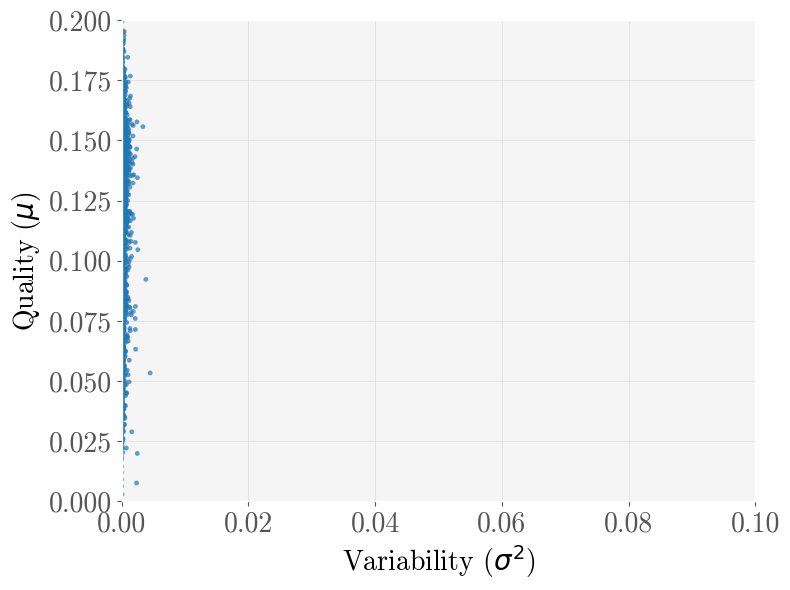

In [17]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import seaborn as sns

# 🔹 1. 커스텀 컬러맵 정의
custom_cmap = LinearSegmentedColormap.from_list(
    "custom_palette", ["#6a0dad", "#20639B", "#3CAEA3", "#F6D55C"], N=256
)

# 🔹 2. 스타일 적용
plt.style.use("ggplot")
plt.rcParams['font.family'] = 'cmr10'
plt.rcParams["axes.unicode_minus"] = False

# 🔹 3. 플롯 생성
light_gray = "#f5f5f5"
plt.figure(figsize=(8, 6))  # 전체 배경색 설정
ax = plt.gca()
ax.set_facecolor(light_gray)  # 그래프 내부 배경색 설정

palette = sns.color_palette("tab10", n_colors=3)

combined_df_sample = df
ax.set_facecolor("#f5f5f5")
scatter1 = ax.scatter(
    combined_df_sample['score_variance'], 
    combined_df_sample['score_mean'], 
    c=palette[0],  
    s=12, 
    edgecolors='none', 
    alpha=0.7
)

ax.set_ylabel('Quality ($\mu$)', fontsize=20, fontweight='bold', color='black')
ax.set_xlabel('Variability ($\sigma^2$)', fontsize=20, fontweight='bold', color='black')
ax.set_ylim(bottom=0, top=0.2)
ax.set_xlim(left=0, right=0.1)
ax.grid(True, linestyle='-', linewidth=0.5, alpha=1, color='#dddddd')
ax.tick_params(axis='both', labelsize=20)  # X, Y축 숫자 크기 증가

# bb = lambda c: dict(boxstyle="round,pad=0.3", ec=c, lw=2, fc="white")
# an1 = ax.annotate("High Variance", xy=(0.8, 0.40), xycoords="axes fraction", fontsize=20, color='black',
#              va="center", ha="center", bbox=bb('grey'))
# an2 = ax.annotate("High Average", xy=(0.25, 0.90), xycoords="axes fraction", fontsize=20, color='black',
#              va="center", ha="center", bbox=bb('grey'))
# an3 = ax.annotate("Low Average", xy=(0.30, 0.15), xycoords="axes fraction", fontsize=20, color='black',
#              va="center", ha="center", bbox=bb('grey'))


# 레이아웃 조정 및 출력
plt.tight_layout()

# 그래프 출력
plt.savefig("scatter_plot_comb.png", dpi=300, bbox_inches='tight', facecolor='w')
plt.savefig("scatter_plot_comb.pdf", dpi=300, bbox_inches='tight', facecolor='w')

plt.show()